In [3]:
##Processamento de grandes matrizes, juntamente com uma grande coleção de funções matemáticas de alto nível para operar sobre estas matrizes
#Uso para possibilidar a alteração a base de dados original que está usando matrizes numpy
import numpy as np

##Criação de gráficos e visualizações de dados em geral
#Usei anteriormente para verificar imagens
import matplotlib.pyplot as plt

##Biblioteca de aprendizado de máquina de código aberto para a linguagem de programação
#O módulo implementa diversas funções de perda, pontuação e utilidade para medir o desempenho da classificação
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

##Biblioteca de código aberto para aprendizado de máquina aplicável a uma ampla variedade de tarefas
import tensorflow as tf
#keras => API de alto nível do TensorFlow para criar e treinar modelos de aprendizado profundo
from tensorflow.keras import models, datasets, layers #Modelos, Banco de Dados, Camadas
from tensorflow.keras.models import load_model #Bilioteca capaz carregar a IA salvada

In [4]:
#Usar keras.datasets para carregar a base de bados cifar100, já separado em x(imagens) e y(classificação) de treino e de teste
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

#Uso somente para verificar sua forma antes de alterá-lo
print(x_train.shape) #(Quantidade, formato...)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
###Retirar tudo não relacionado a veículos da base de dados

#Crio uma lista com o numero correspondente de cada classificação de veículo
veiculos = [8, 13, 41, 48, 58, 69, 81, 85, 89, 90] #['bicycle' , 'bus',  'lawn_mower', 'motorcycle', 'pickup_truck', 'rocket', 'streetcar', 'tank', 'tractor', 'train']

##Crio uma Máscara para filtrar tudo que não está dentro da lista de veiculos no treino e no teste
index_train = [i for i in range(len(y_train)) if y_train[i] not in veiculos]
index_test = [i for i in range(len(y_test)) if y_test[i] not in veiculos]

##Deleta tudo que a mascara confirmar não ser da lista veiculo
#Usa numpy pois datasets usa lista numpy, usa sua função delete
x_train = np.delete(x_train, index_train, axis=0)
y_train = np.delete(y_train, index_train, axis=0)

x_test = np.delete(x_test, index_test, axis=0)
y_test = np.delete(y_test, index_test, axis=0)

#Verificar se sua forma alterou e ver nova quantidade de imagens.
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5000, 32, 32, 3)
(5000, 1)
(1000, 32, 32, 3)
(1000, 1)


In [6]:
#Normalizacão de dados imagens
x_train = x_train / 255
x_test = x_test / 255

#Troca valores numericos de Y para facilidar sua analise, numeros altos geram matrices de saída enormes (90 do 'train' gerava 90 colunas de saída)
for i in range(1, len(veiculos)+1):
  y_train[y_train == veiculos[i-1]] = i
  y_test[y_test == veiculos[i-1]] = i

In [13]:
###Para a classificação de imagens iremos usar MLP

##Usa Sequential, funçaõ que cria modelo especificando cada camada o tipo, quantidade neuronios e funcao de ativação
Vei = models.Sequential([
    #DENSE(MLP)=> camada densa(totalmente conectada), um tipo de camada em que cada neurônio está conectado a todos os neurônios da camada anterior
    layers.Flatten(input_shape = (32,32,3)), #Usamos Flatten para tranformar os dados em linha, pois uma camada densa espera vetor linha
    layers.Dense(100, activation='relu'),  #(Numero de neuronios, função de ativação)
    layers.Dense(50, activation='relu'),  #(Numero de neuronios, função de ativação)
    layers.Dense(11, activation='softmax'),
])


#Configura modelo para treinamento.
Vei.compile(optimizer='adam',  #Otimizador do Modelo, usa algoritmo Adam
            loss='sparse_categorical_crossentropy',  #Calcula a perda de entropia cruzada entre os rótulos e as previsões.
            metrics=['accuracy'])  #Calcula com que frequência as previsões equivalem aos rótulos.

#Começa treino com modelo criado, inserindo as imagens(x), classificaçoes(y) e numero de repetiçoes do treino
Vei.fit(x_train, y_train, epochs=15)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1996 - loss: 2.2592
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3160 - loss: 1.9188
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3583 - loss: 1.8480
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3766 - loss: 1.7665
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4107 - loss: 1.7054
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4293 - loss: 1.6670
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4386 - loss: 1.6357
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4320 - loss: 1.6386
Epoch 9/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4512 - loss: 1.5923
Epoch 10/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4646 - loss: 1.5522
Epoch 11/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4565 - loss: 1.5848
Epoch 12/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

In [14]:
#Avalia o medelo geral, mostrando uma porcentagem de acuracia nas suas previsões
Vei.evaluate(x_test,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4605 - loss: 1.6354


[1.6190896034240723, 0.45399999618530273]

In [126]:
##Salvar modelo completo(arquitetura + peso) na pasta atual
Vei.save('cifar100_models.keras')

##Carrega o modelo
model=load_model('cifar100_models.keras')

#Informa sobre nosso modelo
Vei.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_31 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 160)                 │         491,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 90)                  │          14,490 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 11)                  │           1,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,521,515 (5.80 MB)

 Trainable params: 507,171 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,014,344 (3.87 MB)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


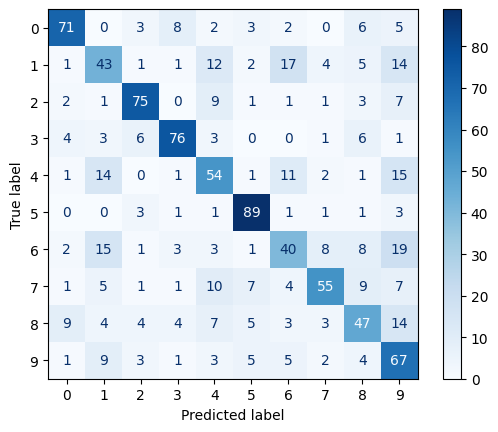

In [ ]:
###Matriz de confusão do conjunto de treino(Traz uma ideia do numero de acertos da IA)

#Faz previsões no conjunto de teste
y_pred = np.argmax(Vei.predict(x_test), axis=1)

#Calcula matrix de confusao
conf_matrix = confusion_matrix(y_test, y_pred)

#Exibe matrix de confusão
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')

In [ ]:
#Nome das classes  [8, 13, 48, 58, 69, 81, 85, 89, 90] => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
class_names = ['bicycle' , 'bus',  'lawn_mower', 'motorcycle', 'pickup_truck', 'rocket', 'streetcar', 'tank', 'tractor', 'train']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[9]


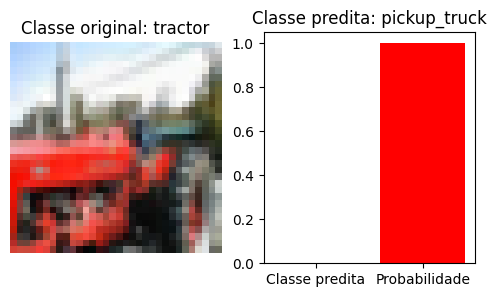

Classe prevista: pickup_truck
Classe original: tractor


In [ ]:
##Fazendo previsões com modelo carregado

#Simula nova entrada: seleciona uma imagem aleatoria do conjuto de teste
random_idx = np.random.randint(0, x_test.shape[0])
new_input= x_test[random_idx].reshape(1, 32, 32, 3) #Redimensiona para formado esperado pelo modelo

#Faz previsão
prediction= Vei.predict(new_input)
predict_class=np.argmax(prediction)

#Obtem a classe original
original_class=y_test[random_idx]
print(original_class)

#Exibe imagem entrada e suas classes
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(new_input[0], cmap='gray')
plt.title("Classe original: "+class_names[original_class[0]-1])
plt.axis('off')

plt.subplot(1,2,2)
plt.bar([0,1],[prediction[0, original_class[0]],1-prediction[0, original_class[0]]], color=['blue', 'red'])
plt.xticks([0,1], ['Classe predita', 'Probabilidade'])
plt.title(f'Classe predita: {class_names[predict_class-1]}')
plt.show()

print("Classe prevista: "+class_names[predict_class-1])
print("Classe original: "+class_names[original_class[0]-1])